# TASK-4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Data Collection: Gather tweets mentioning a brand over the past month.

Preprocessing: Clean the text, remove stop words, and tokenize the tweets.

Sentiment Analysis: Aggregate Sentiment Scores and Create Visualizations

Word Cloud Visualization: Generate word clouds for positive and negative sentiment categories based on your cleaned tweet data.

Correlation Analysis: Select relevant numerical columns for correlation with sentiment scores and visualize the correlation matrix using a heatmap.



# Step 1: Data Loading and Preprocessing (Including Handling Missing Values)

In [6]:
import pandas as pd

# Load the datasets
training_data = pd.read_csv('C:\\Users\\NIHARIKA\\Documents\\intern\\taskFour\\twitter_training.csv')
validation_data = pd.read_csv('C:\\Users\\NIHARIKA\\Documents\\intern\\taskFour\\twitter_validation.csv')

# Display the first few rows of each dataset to understand their structure
training_data.head()


,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
validation_data.head()

,ID,Brands,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Data Preprocessing

In [8]:
# Combine the training and validation datasets
combined_data = pd.concat([training_data, validation_data], ignore_index=True)

# Clean the text: Convert to lowercase and remove special characters (basic cleaning)
combined_data['cleaned_tweet'] = combined_data['Tweet content'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Handle missing values in 'cleaned_tweet' column
combined_data['cleaned_tweet'].fillna('', inplace=True)

# Convert sentiment to numerical scores: Positive=1, Neutral=0, Negative=-1, Irrelevant=0
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
    'Irrelevant': 0
}
combined_data['sentiment_score'] = combined_data['sentiment'].map(sentiment_mapping)

# Handle missing values in 'sentiment_score' column
combined_data['sentiment_score'].fillna(0, inplace=True)

# Verify the preprocessing
combined_data.head(10)

,Tweet ID,entity,sentiment,Tweet content,ID,Brands,Sentiment,Content,cleaned_tweet,sentiment_score
0,2401.0,Borderlands,Positive,im getting on borderlands and i will murder yo...,NaN,NaN,NaN,NaN,im getting on borderlands and i will murder yo...,1.0
1,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,i am coming to the borders and i will kill you...,1.0
2,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN,im getting on borderlands and i will kill you all,1.0
3,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN,im coming on borderlands and i will murder you...,1.0
4,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN,im getting on borderlands 2 and i will murder ...,1.0
5,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN,im getting into borderlands and i can murder y...,1.0
6,2402.0,Borderlands,Positive,So I spent a few hours making something for fu...,NaN,NaN,NaN,NaN,so i spent a few hours making something for fu...,1.0
7,2402.0,Borderlands,Positive,So I spent a couple of hours doing something f...,NaN,NaN,NaN,NaN,so i spent a couple of hours doing something f...,1.0
8,2402.0,Borderlands,Positive,So I spent a few hours doing something for fun...,NaN,NaN,NaN,NaN,so i spent a few hours doing something for fun...,1.0
9,2402.0,Borderlands,Positive,So I spent a few hours making something for fu...,NaN,NaN,NaN,NaN,so i spent a few hours making something for fu...,1.0


# Step 3: Aggregate Sentiment Scores and Create Visualizations

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_data['cleaned_tweet'], combined_data['sentiment_score'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict sentiment for the entire dataset
combined_data_vec = vectorizer.transform(combined_data['cleaned_tweet'])
combined_data['predicted_sentiment'] = model.predict(combined_data_vec)

# Verify the 'predicted_sentiment' column
combined_data[['entity', 'predicted_sentiment']].head()


              precision    recall  f1-score   support

        -1.0       0.76      0.81      0.79      4512
         0.0       0.81      0.75      0.78      6463
         1.0       0.74      0.76      0.75      4162

    accuracy                           0.77     15137
   macro avg       0.77      0.78      0.77     15137
weighted avg       0.78      0.77      0.77     15137



,entity,predicted_sentiment
0,Borderlands,1.0
1,Borderlands,1.0
2,Borderlands,1.0
3,Borderlands,1.0
4,Borderlands,1.0


# Average Sentiment Score by Entity

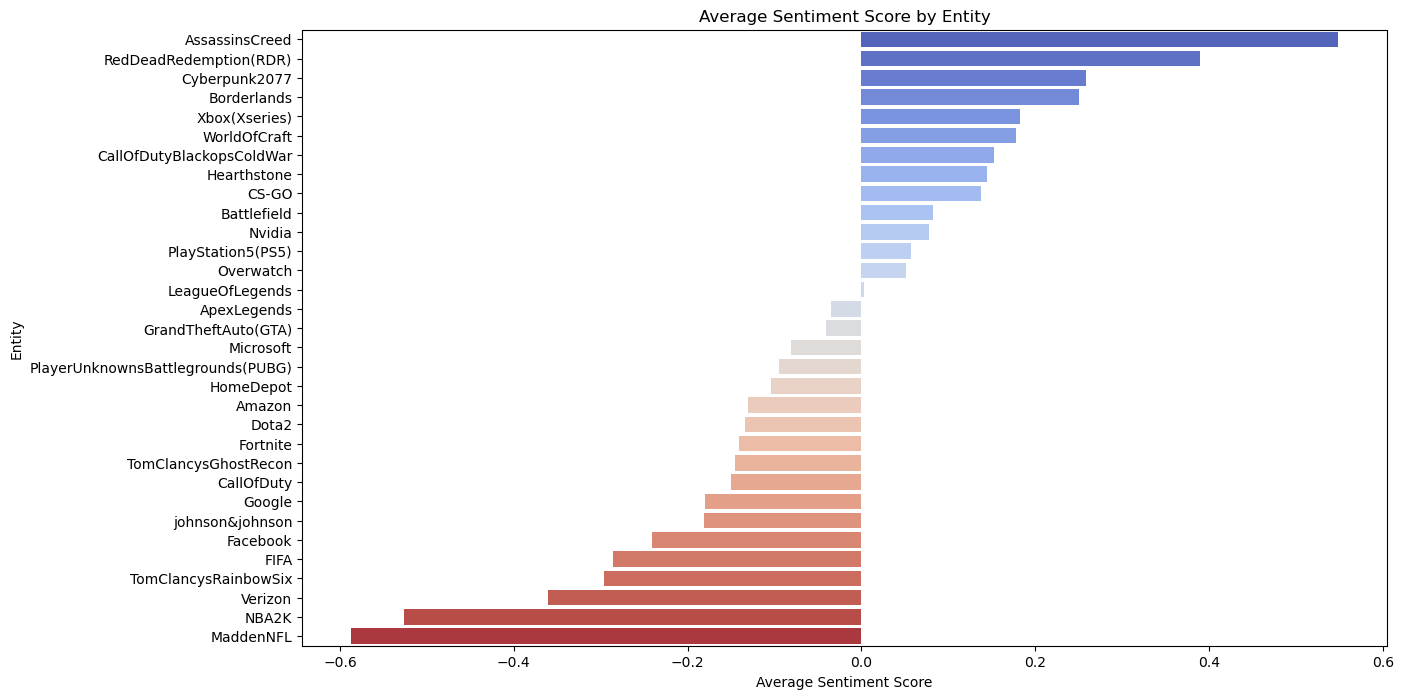

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sentiment scores by entity
entity_sentiment = combined_data.groupby('entity')['predicted_sentiment'].mean().reset_index()

# Sort entities by average sentiment score
entity_sentiment = entity_sentiment.sort_values(by='predicted_sentiment', ascending=False)

# Plot the average sentiment score for each entity
plt.figure(figsize=(14, 8))
sns.barplot(x='predicted_sentiment', y='entity', data=entity_sentiment, palette='coolwarm')
plt.title('Average Sentiment Score by Entity')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Entity')
plt.show()


# Sentiment Distribution Across Entities

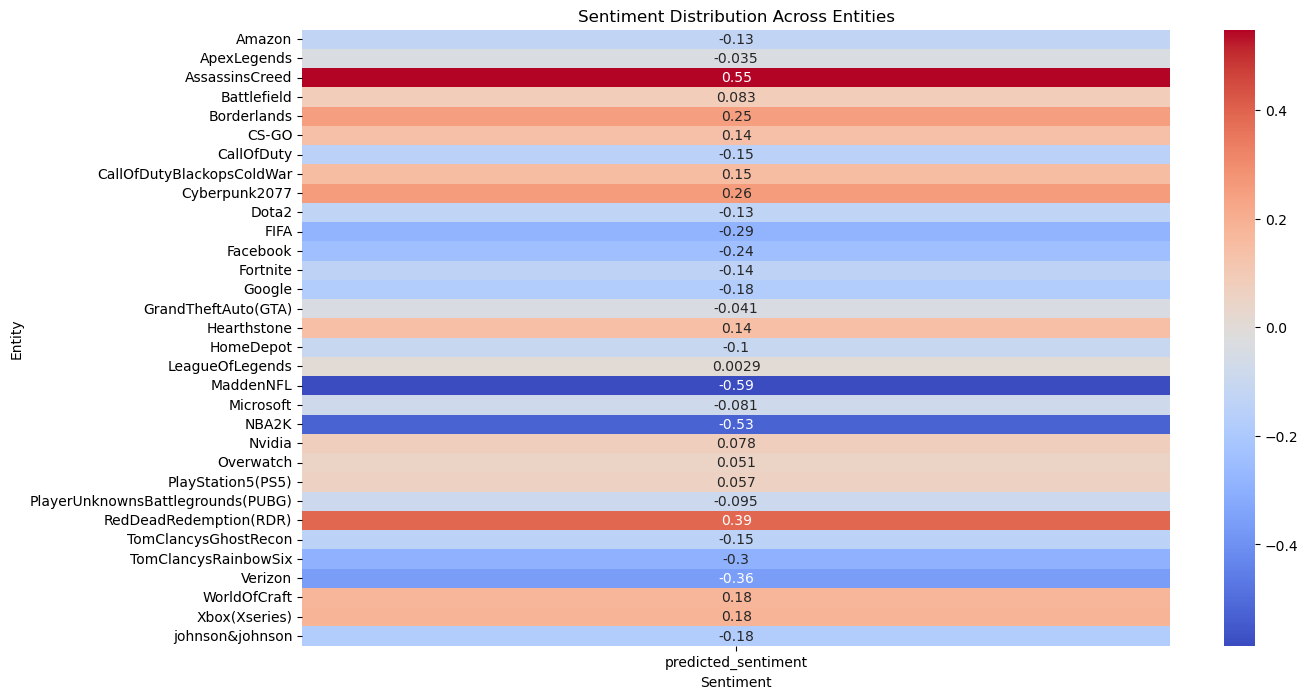

In [11]:
# Create a pivot table with entities and sentiments
pivot_table = combined_data.pivot_table(values='predicted_sentiment', index='entity', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Sentiment Distribution Across Entities')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()


# Step 4: Word Cloud Visualization:

Generate word clouds for positive and negative sentiment categories based on your cleaned tweet data.

In [12]:
# Inspect the columns to find the correct datetime column
print(combined_data.columns)


Index(['Tweet ID', 'entity', 'sentiment', 'Tweet content', 'ID', 'Brands',
       'Sentiment', 'Content', 'cleaned_tweet', 'sentiment_score',
       'predicted_sentiment'],
      dtype='object')


In [15]:
from wordcloud import WordCloud

In [20]:
# Assuming you have a DataFrame or variables like positive_tweets, negative_tweets, etc.
positive_tweets = combined_data[combined_data['sentiment'] == 'Positive']['Tweet content']
negative_tweets = combined_data[combined_data['sentiment'] == 'Negative']['Tweet content']

# Convert NaN values to empty strings (if applicable)
positive_tweets = positive_tweets.fillna('').astype(str)
negative_tweets = negative_tweets.fillna('').astype(str)

# Combine positive and negative tweets text
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

In [21]:
# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)


(-0.5, 799.5, 399.5, -0.5)

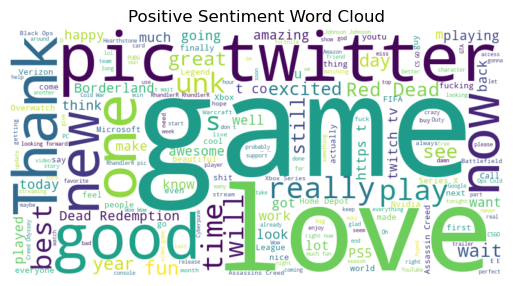

In [22]:
# Plot word clouds
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

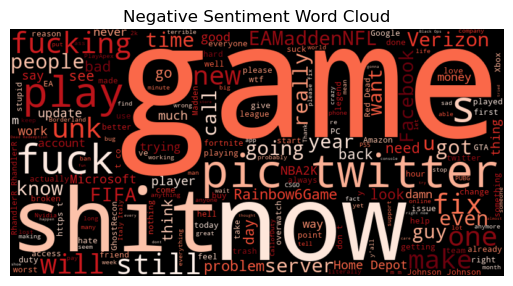

In [30]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')



# Correlation Analysis 

Select relevant numerical columns for correlation with sentiment scores and visualize the correlation matrix using a heatmap.

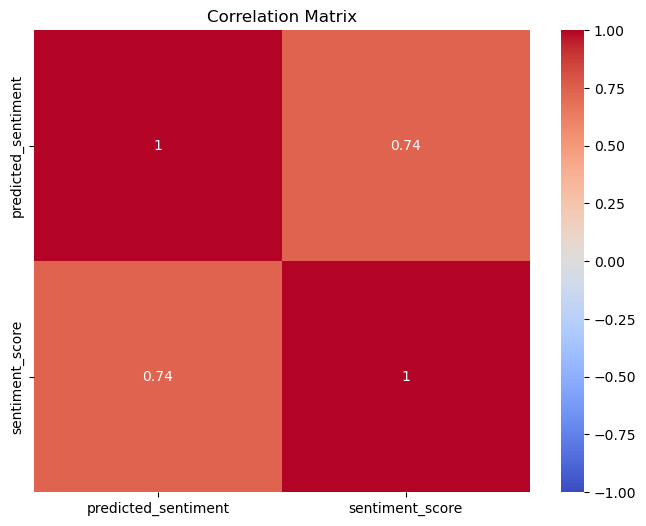

In [29]:
# Example correlation analysis
correlation_data = combined_data[['predicted_sentiment', 'sentiment_score']]  # Replace with actual numerical columns

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
